In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

In [53]:
mnist_train=pd.read_csv("train.csv")
mnist_test=pd.read_csv("test.csv")

## There are 784 pixels columns therefore the reshape has to be done on Root(784)

Text(0.5, 1.0, 'label :3')

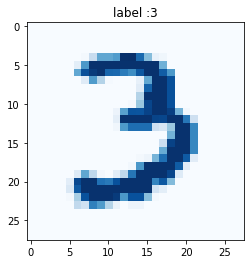

In [54]:
plt.imshow(mnist_train.iloc[9,1:].values.reshape(28,28),cmap='Blues')
plt.title('label :{}'.format(mnist_train.iloc[9,0]))

# Normalizing the dataset

In [55]:
mnist_train_data = mnist_train.loc[:, "pixel0":]
mnist_train_label = mnist_train.loc[:, "label"]


mnist_train_data = mnist_train_data/255.0
mnist_test = mnist_test/255.0

## Applying the Standard Scaler

In [56]:
from sklearn.preprocessing import StandardScaler

standardized_scalar = StandardScaler()
train_data = standardized_scalar.fit_transform(mnist_train_data)


In [57]:
train_data.shape

(42000, 784)

## Implementing PCA for Dimentionality Reduction (Taking 

In [58]:
from sklearn import decomposition

PCA = decomposition.PCA()
PCA.n_components = 200
pca_data = PCA.fit_transform(train_data)
pca_data=pd.DataFrame(pca_data)

## Adding dataframe with the labels

In [59]:
pca_data.insert(2,"label",mnist_train_label,True)

## Checking the distribution

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


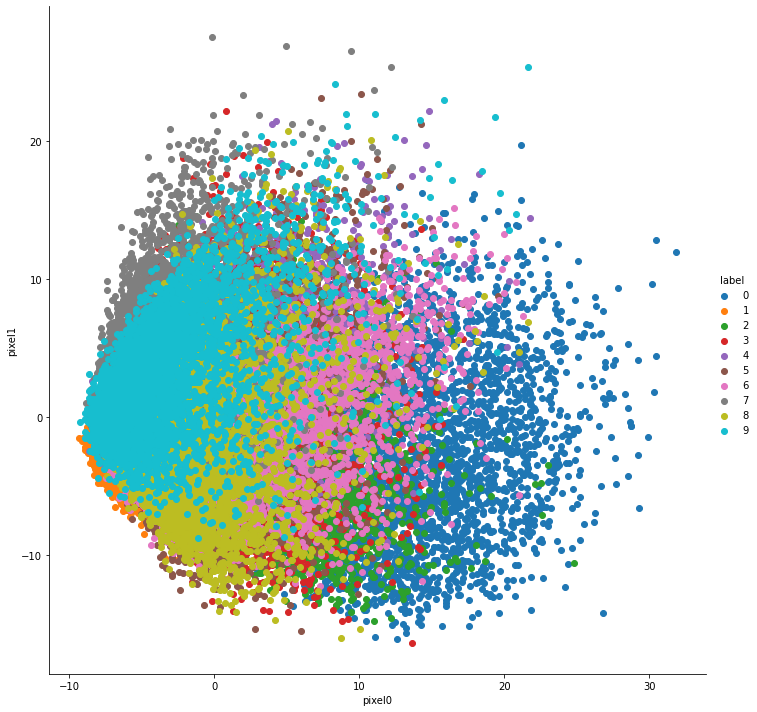

In [83]:
sns.FacetGrid(pca_data,hue='label',size=10).map(plt.scatter, "pixel0","pixel1").add_legend()

# Training the model Using random forest on PCA Dataset

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [63]:
from sklearn.model_selection import KFold, StratifiedKFold

from scipy.optimize import fmin 
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [64]:
X = pca_data.drop(["label"],axis=1)
Y = pca_data["label"]


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [73]:
forest = RandomForestClassifier(n_estimators=100, random_state=5)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [74]:
y_pred=forest.predict(X_test)

In [75]:
cm = confusion_matrix(Y_test, y_pred) 

In [76]:
precision = np.diag(cm)/np.sum(cm, axis=0)
recall    = np.diag(cm)/np.sum(cm, axis=1)

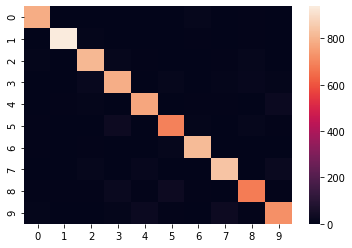

In [77]:
sns.heatmap(cm)

In [78]:
np.mean(precision)

0.9333876565119997

## Training the dataset with Neural Networks on the entire dataset

In [101]:
x=mnist_train_data.values.reshape(mnist_train_data.shape[0],28,28,1)


In [107]:
y=mnist_train_label
y=to_categorical(y,num_classes=10)

## Importing Keras Libraries

In [114]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, random_state=5)

## Defining the layers of CNN

In [127]:
#keras layers

model=Sequential()
# model.add(Conv2D(filters=32,kernel_size=5, padding='Same',activation='relu',))
# model.add(MaxPool2D(pool_size=2))
# model.add(BatchNormalization())


model.add(Conv2D(filters=16,kernel_size=3, padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=8,kernel_size=4, padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=4,kernel_size=2, padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

#fully connected layers
model.add(Dense((10),activation='softmax'))



model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=["accuracy"])




In [119]:
model.fit(X_train,Y_train,epochs=10, validation_data=(X_test,Y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 24s 714us/sample - loss: 0.1274 - acc: 0.9625 - val_loss: 0.0902 - val_acc: 0.9740
Epoch 2/10
33600/33600 [==============================] - 26s 776us/sample - loss: 0.1269 - acc: 0.9623 - val_loss: 0.0876 - val_acc: 0.9750
Epoch 3/10
33600/33600 [==============================] - 24s 719us/sample - loss: 0.1212 - acc: 0.9636 - val_loss: 0.0939 - val_acc: 0.9751
Epoch 4/10
33600/33600 [==============================] - 24s 715us/sample - loss: 0.1202 - acc: 0.9645 - val_loss: 0.0859 - val_acc: 0.9752
Epoch 5/10
33600/33600 [==============================] - 24s 715us/sample - loss: 0.1096 - acc: 0.9670 - val_loss: 0.0844 - val_acc: 0.9765
Epoch 6/10
33600/33600 [==============================] - 24s 717us/sample - loss: 0.1064 - acc: 0.9679 - val_loss: 0.0848 - val_acc: 0.9780
Epoch 7/10
33600/33600 [==============================] - 24s 717us/sample - loss: 0.1049 - acc: 0.9690 -

In [128]:
test = mnist_test.values.reshape(-1,28,28,1)

In [129]:
all_target = model.predict(test)

In [130]:
Y_pred=np.argmax(all_target,axis=1)

In [132]:
Y_pred.shape

(28000,)

In [133]:
predictions = pd.DataFrame({"ImageId": np.arange(1, len(Y_pred)+1), "Label": Y_pred})

In [135]:
predictions = predictions.set_index("ImageId")

In [136]:
predictions.to_csv("submission.csv")